# We are assembling all elements of figure 3 of the TwinC paper in this notebook. 

In [1]:
import os
import scipy
import numpy as np
import configparser
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums

if not os.path.exists(f"../../figures"):
    os.system(f"mkdir ../../figures")
else:
    print(f"figures directory exists")

if not os.path.exists(f"../../figures/regression_accuracy"):
    os.system(f"mkdir ../../figures/regression_accuracy")
else:
    print(f"regression_accuracy figures directory exists")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


figures directory exists


In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rcParams['axes.facecolor']='white'
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

save_corr = np.load("../../results/regression_h1esc/h1esc_10times100sample_corr.npz")

all_orca_corr_orca_norm = save_corr["all_orca_corr_orca_norm"]
all_twinc_corr_orca_norm = save_corr["all_twinc_corr_orca_norm"]
all_orca_corr_twinc_norm = save_corr["all_orca_corr_twinc_norm"]
all_twinc_corr_twinc_norm = save_corr["all_twinc_corr_twinc_norm"] 
all_orca_corr_no_norm = save_corr["all_orca_corr_no_norm"]
all_twinc_corr_no_norm = save_corr["all_twinc_corr_no_norm"]

## Spearman R between Orca and observed Hi-C data (x-axis) and TwinC and observed Hi-C data (y-axis)
### TwinC like Hi-C normalization

RanksumsResult(statistic=1.1338934190276817, pvalue=0.12841962897892828)
10 0


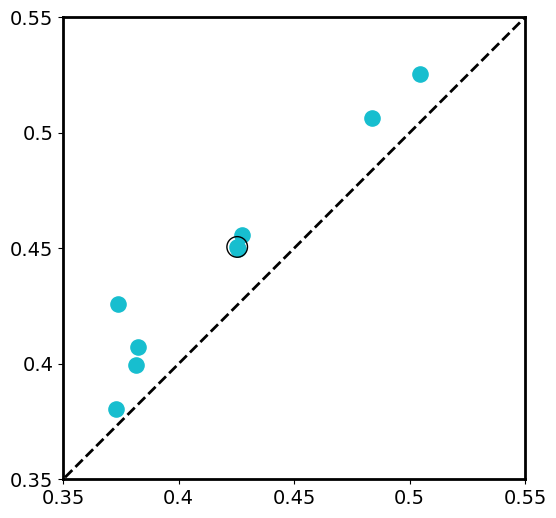

In [3]:
figure, axis = plt.subplots(1, 1, figsize=(6, 6))

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(2)

mu = scipy.stats.ranksums(all_twinc_corr_twinc_norm, all_orca_corr_twinc_norm, alternative="greater")
print(mu)

top_left = 0
bottom_right = 0
for a, b in zip(all_orca_corr_twinc_norm, all_twinc_corr_twinc_norm):
    if a < b:
        top_left += 1
    elif a > b:
        bottom_right += 1
        
print(top_left, bottom_right)

axis.scatter(all_orca_corr_twinc_norm, all_twinc_corr_twinc_norm, s=120, color='#17becf')
axis.scatter(all_orca_corr_twinc_norm[0], all_twinc_corr_twinc_norm[0], facecolors='none', edgecolors='black', s=220)
axis.set_xlim([0.35, 0.55])
axis.set_xticks([0.35, 0.40, 0.45, 0.50, 0.55])
axis.set_xticklabels([0.35, 0.40, 0.45, 0.50, 0.55], fontsize=14)
axis.set_ylim([0.35, 0.55])
axis.set_yticks([0.35, 0.40, 0.45, 0.50, 0.55])
axis.set_yticklabels([0.35, 0.40, 0.45, 0.50, 0.55], fontsize=14)
axis.plot([0, 1], [0, 1], '--', c='black', linewidth=2)


ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig("../../figures/regression_accuracy/twinc_norm_scatterplot_h1esc.pdf", transparent=True)

## Spearman R between Orca and observed Hi-C data (x-axis) and TwinC and observed Hi-C data (y-axis)
### Orca like Hi-C normalization

RanksumsResult(statistic=0.30237157840738177, pvalue=0.3811844092349199)
6 4


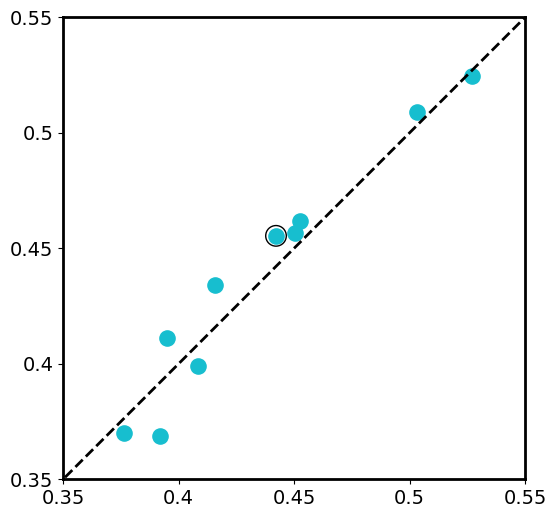

In [4]:
figure, axis = plt.subplots(1, 1, figsize=(6, 6))

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(2)

mu = scipy.stats.ranksums(all_twinc_corr_orca_norm, all_orca_corr_orca_norm, alternative="greater")
print(mu)

top_left = 0
bottom_right = 0
for a, b in zip(all_orca_corr_orca_norm, all_twinc_corr_orca_norm):
    if a < b:
        top_left += 1
    elif a > b:
        bottom_right += 1
        
print(top_left, bottom_right)

axis.scatter(all_orca_corr_orca_norm, all_twinc_corr_orca_norm, s=120, color='#17becf')
axis.scatter(all_orca_corr_orca_norm[0], all_twinc_corr_orca_norm[0], facecolors='none', edgecolors='black', s=220)
axis.set_xlim([0.35, 0.55])
axis.set_xticks([0.35, 0.40, 0.45, 0.50, 0.55])
axis.set_xticklabels([0.35, 0.40, 0.45, 0.50, 0.55], fontsize=14)
axis.set_ylim([0.35, 0.55])
axis.set_yticks([0.35, 0.40, 0.45, 0.50, 0.55])
axis.set_yticklabels([0.35, 0.40, 0.45, 0.50, 0.55], fontsize=14)
axis.plot([0, 1], [0, 1], '--', c='black', linewidth=2)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig("../../figures/regression_accuracy/orca_norm_scatterplot_h1esc.pdf", transparent=True)

## Plot the spearman correlation between observed and predicted Hi-C data

In [5]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rcParams['axes.facecolor']='white'
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

save_samples_for_scatter = np.load(f"../../results/regression_h1esc/h1esc_10k_points_for_scatter.npz")

all_true_twinc = save_samples_for_scatter['all_true_twinc']
all_true_orca = save_samples_for_scatter['all_true_orca']
all_pred_orca = save_samples_for_scatter['all_pred_orca']
all_pred_twinc = save_samples_for_scatter['all_pred_twinc']

## Plot Density plot between observed and predicted Hi-C data (TwinC prediction and observed data with TwinC normalization)

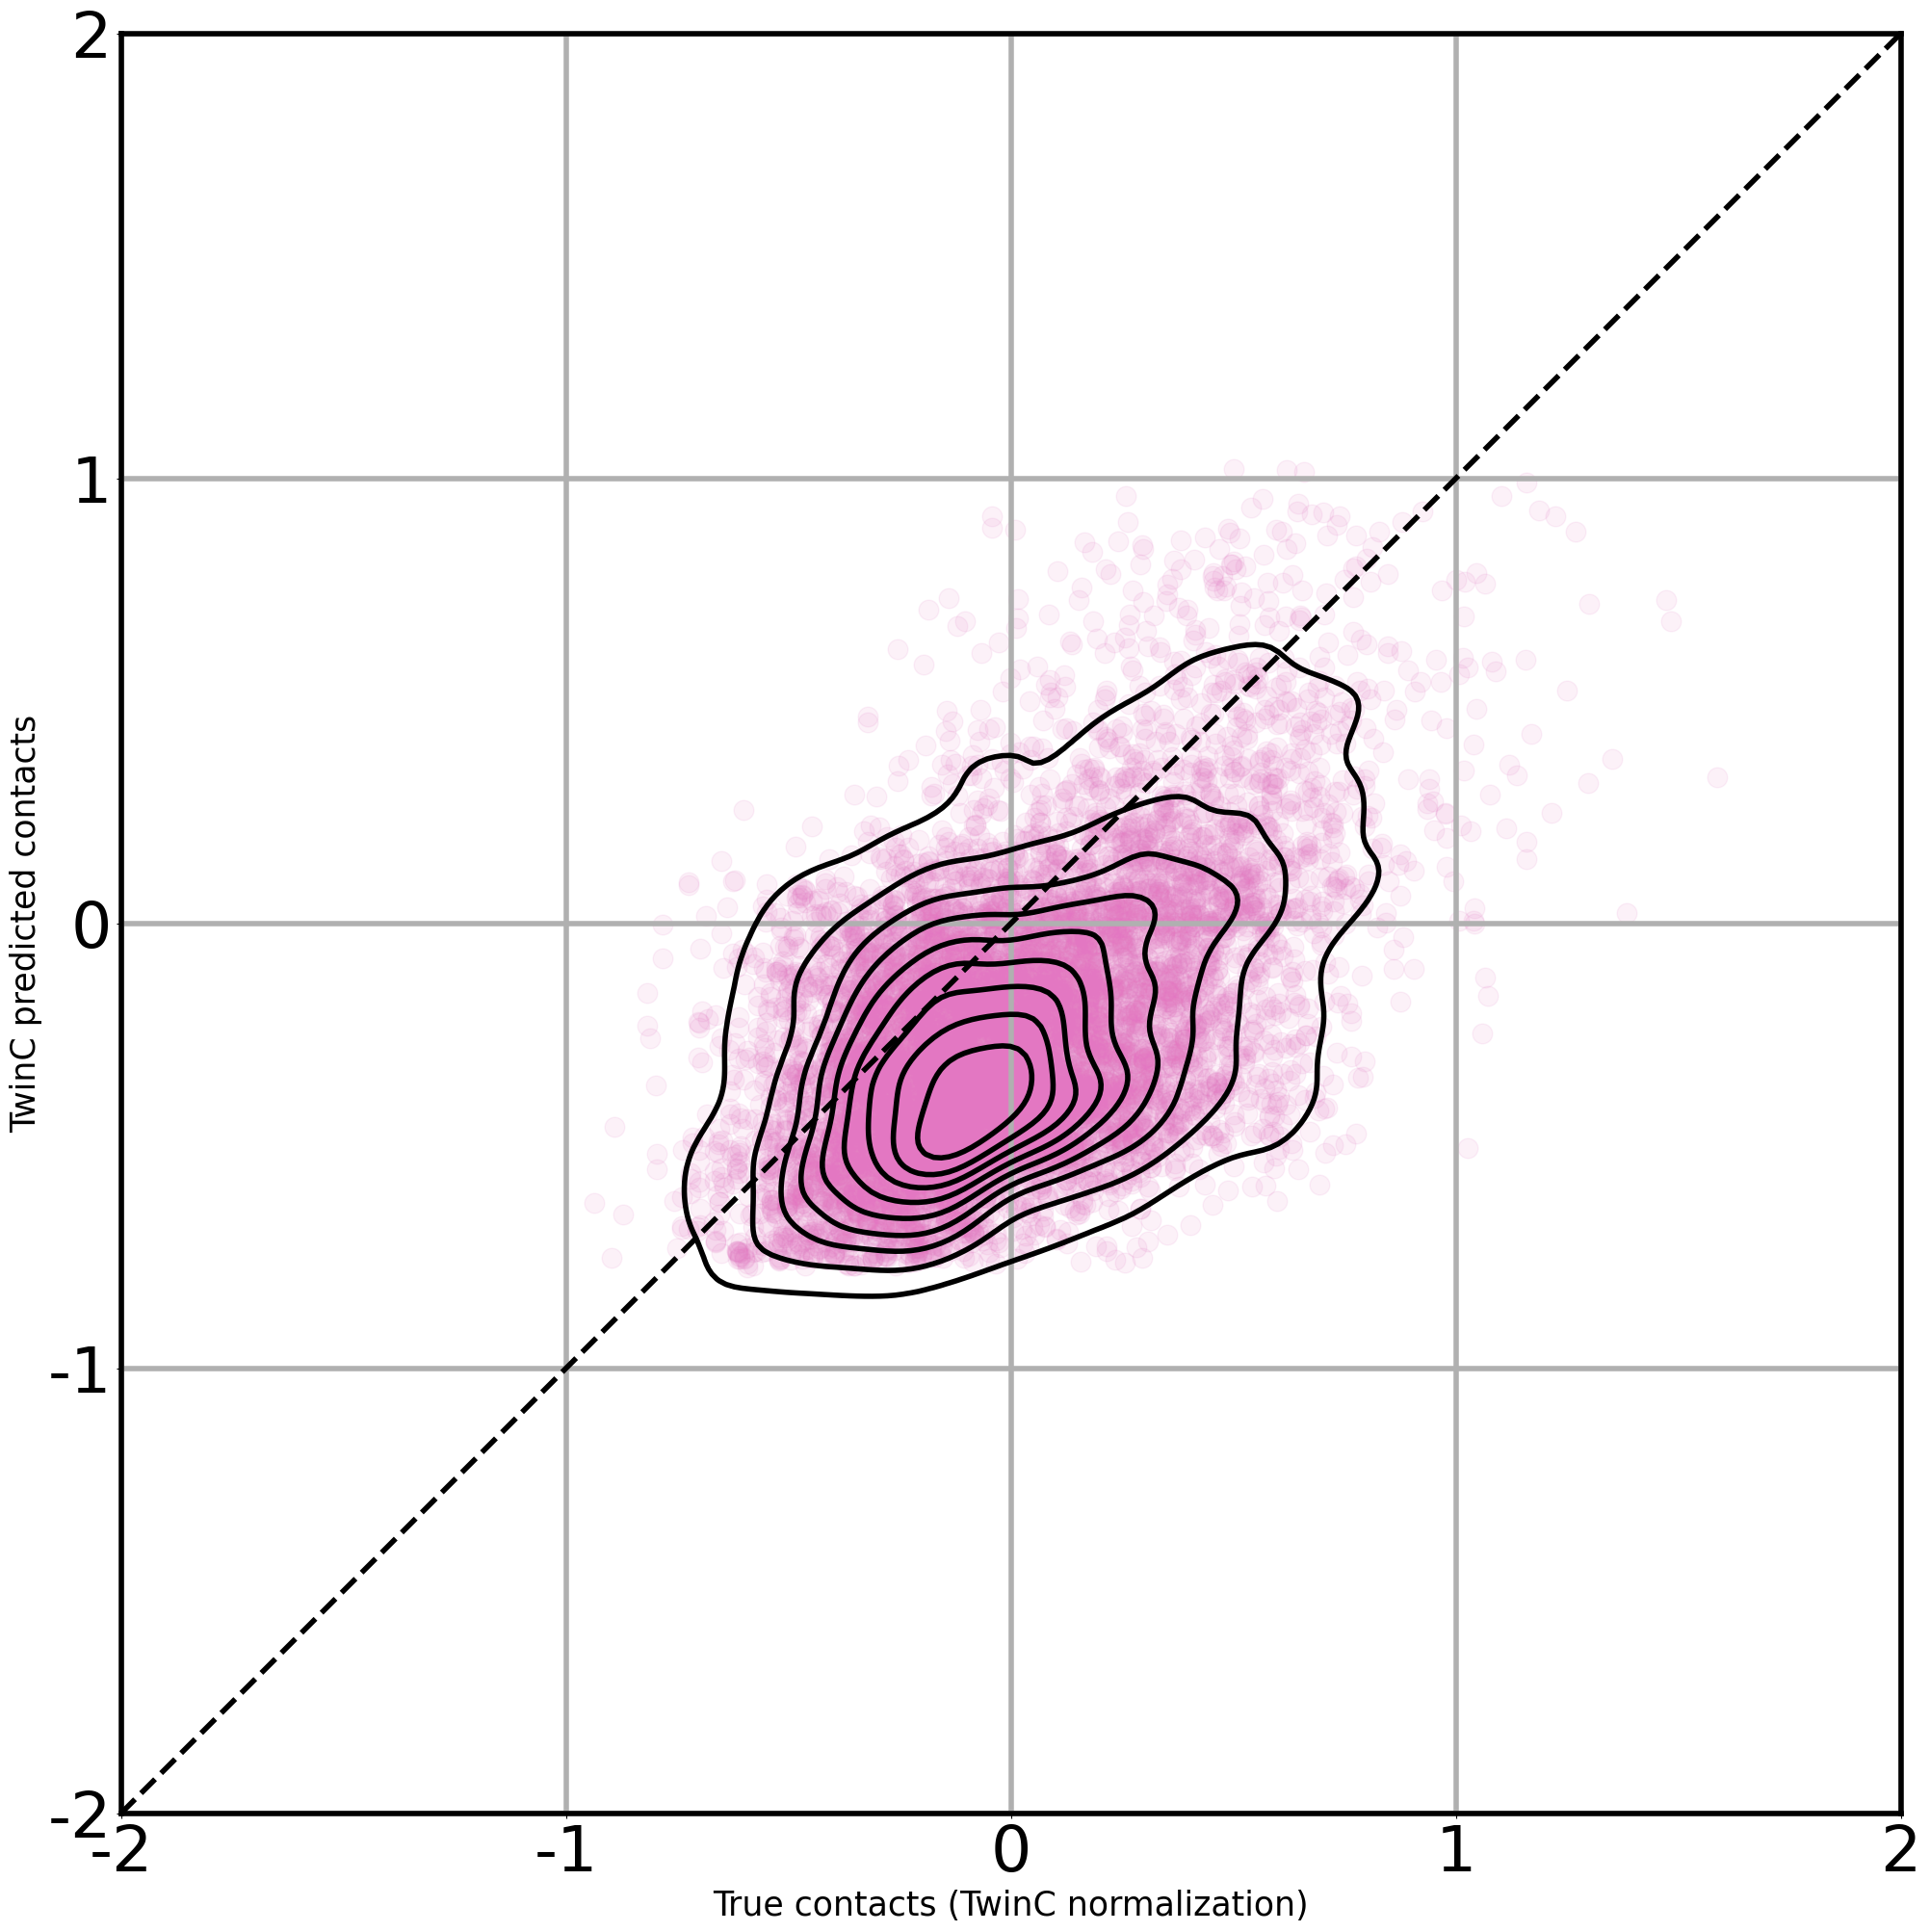

In [6]:
figure, axis = plt.subplots(1, 1, figsize=(24, 24))

axis.scatter(all_true_twinc, all_pred_twinc, color="#e377c2", alpha=0.1, s=220, label=f"Avg R: {np.mean(all_twinc_corr_twinc_norm):.4f}")
sns.kdeplot(x=all_true_twinc, y=all_pred_twinc, color='black', linewidths=4, ax=axis)
axis.set_xlim([-2, 2])
axis.set_xticks([-2, -1, 0, 1, 2])
axis.set_xticklabels([-2, -1, 0, 1, 2], fontsize=48)
axis.set_ylim([-2, 2])
axis.set_yticks([-2, -1, 0, 1, 2])
axis.set_yticklabels([-2, -1, 0, 1, 2], fontsize=48)
axis.plot([-2, 2], [-2, 2], '--', c='black', linewidth=4)
axis.set_xlabel("True contacts (TwinC normalization)")
axis.set_ylabel("TwinC predicted contacts")
axis.grid(True)
axis.grid(linewidth=4)

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(4)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

plt.savefig("../../figures/regression_accuracy/twinc_pred_twinc_norm_h1esc.png", transparent=True)
plt.show()


## Plot Density plot between observed and predicted Hi-C data (TwinC prediction and observed data with Orca normalization)

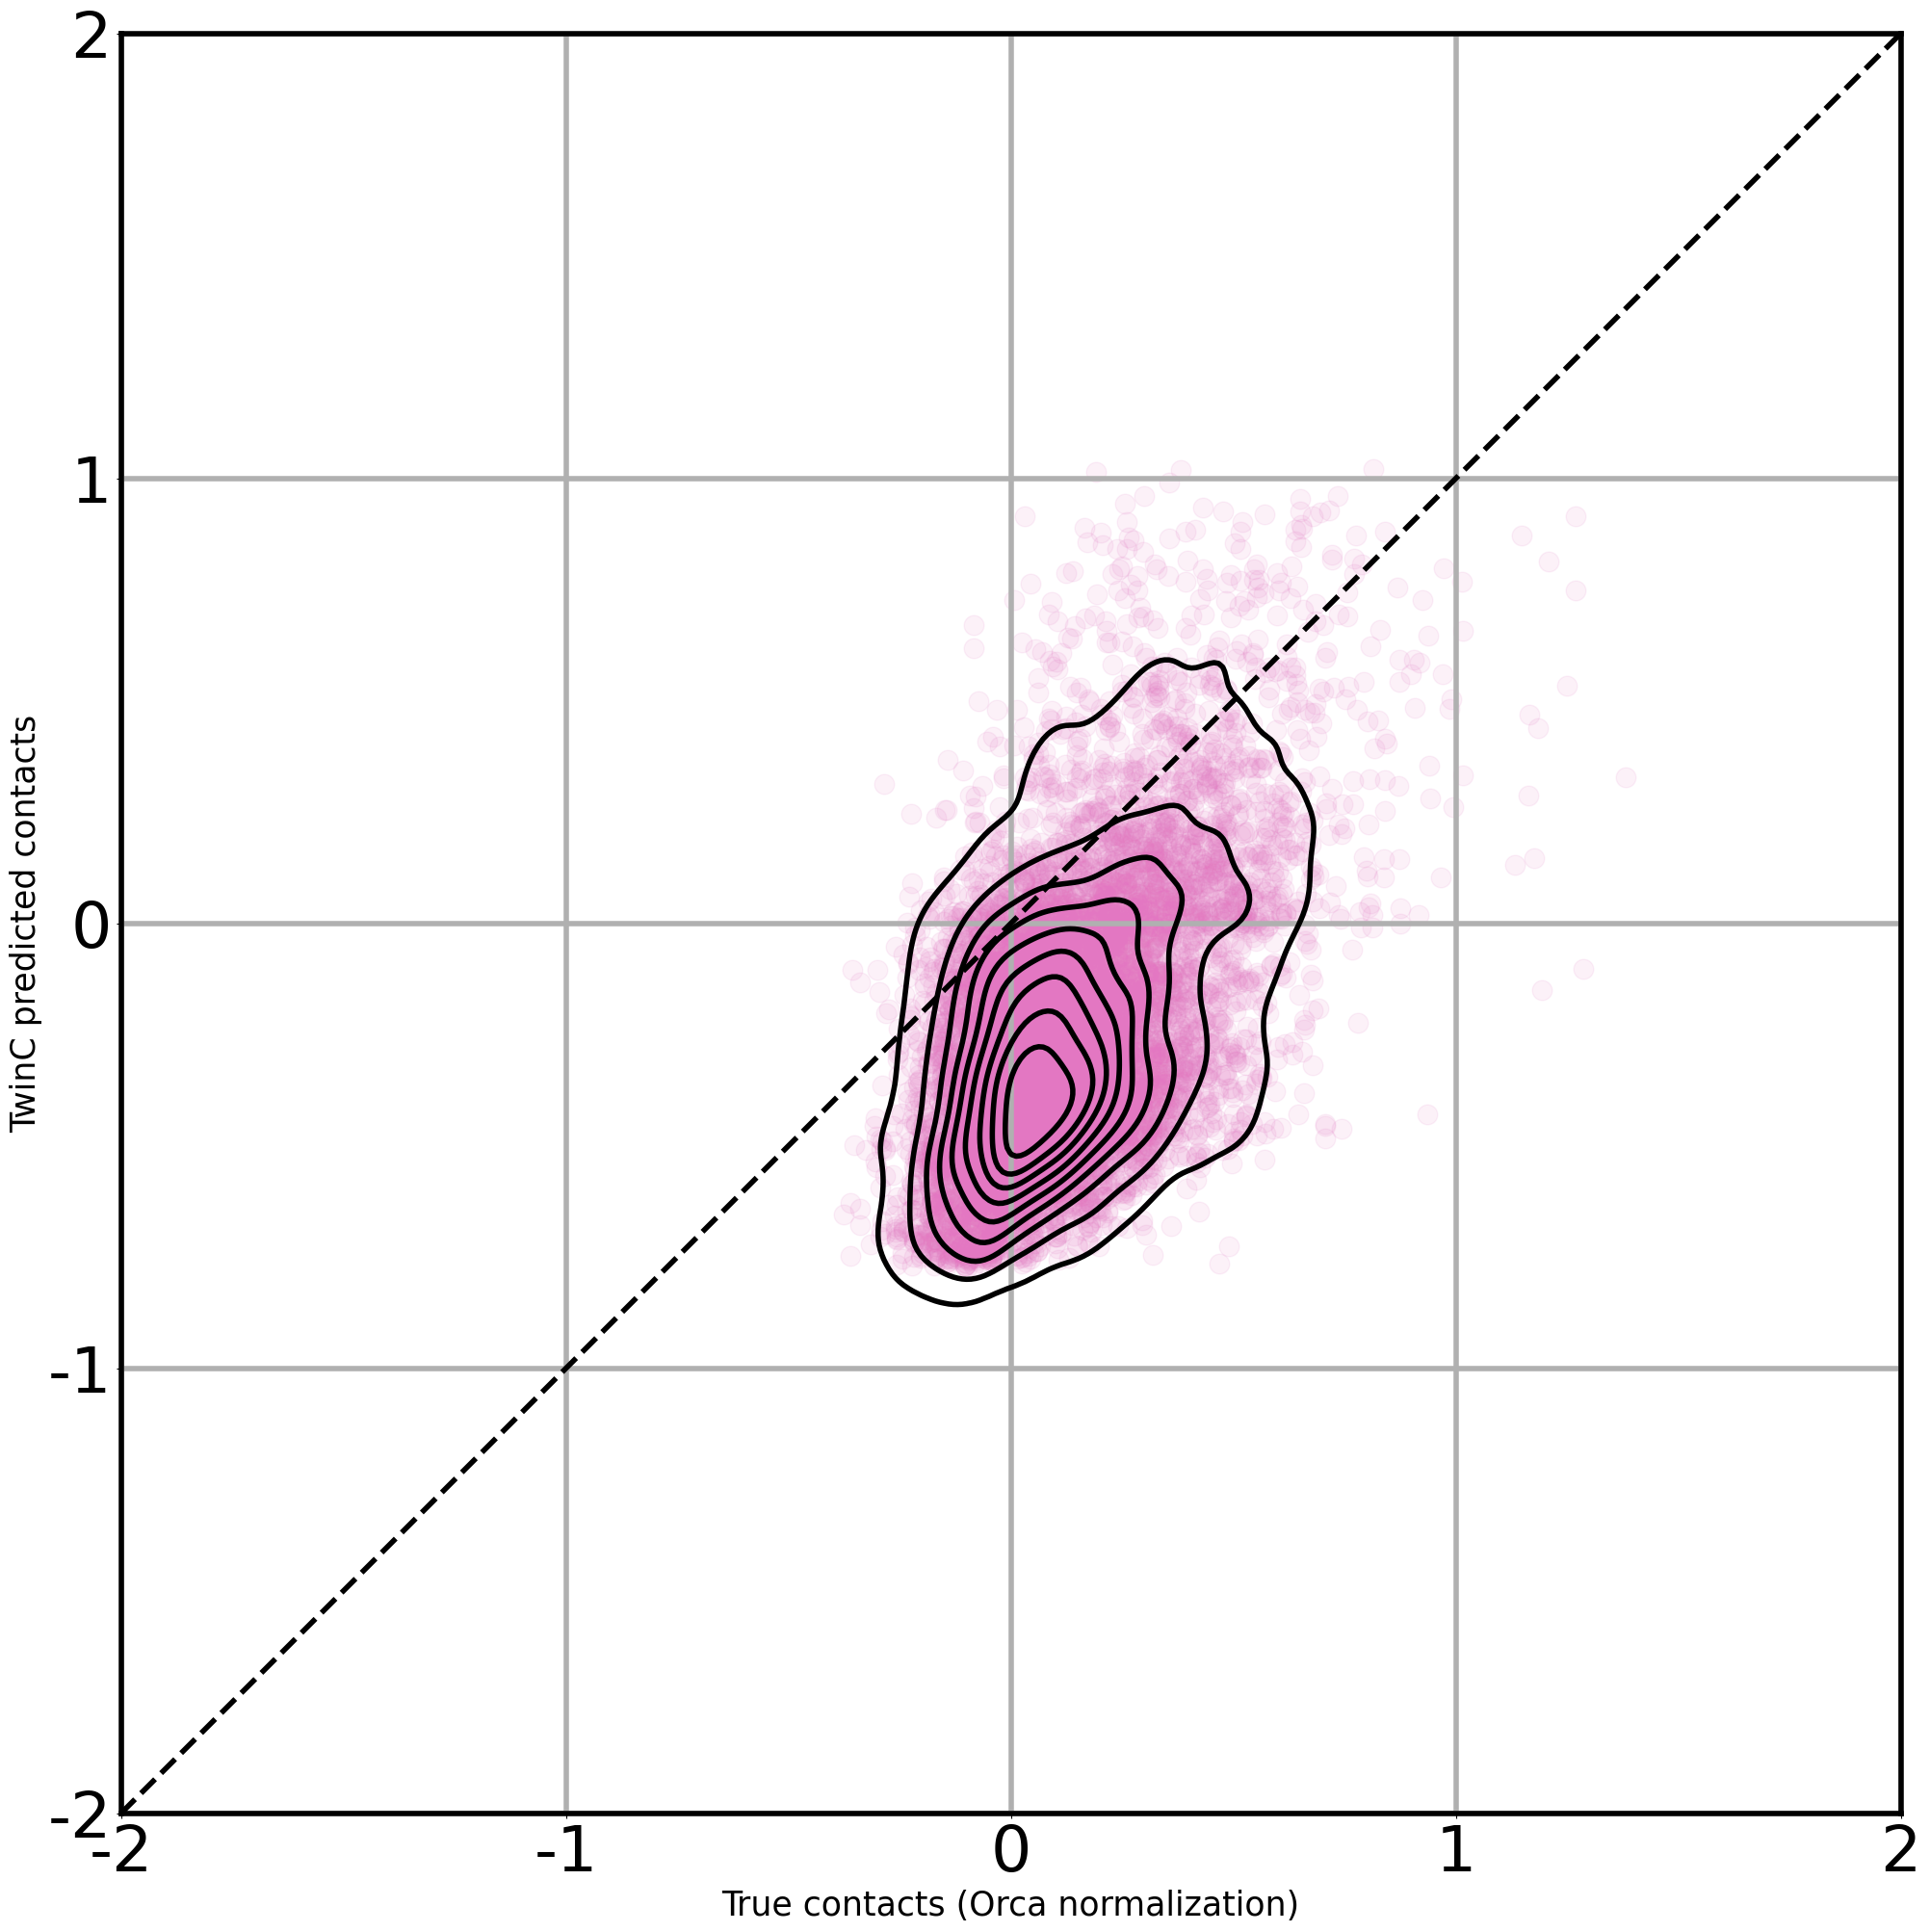

In [7]:
figure, axis = plt.subplots(1, 1, figsize=(24, 24))

axis.scatter(all_true_orca, all_pred_twinc, color="#e377c2", alpha=0.1, s=220, label=f"Avg R: {np.mean(all_twinc_corr_orca_norm):.4f}")
sns.kdeplot(x=all_true_orca, y=all_pred_twinc, color='black', linewidths=4, ax=axis)
axis.set_xlim([-2, 2])
axis.set_xticks([-2, -1, 0, 1, 2])
axis.set_xticklabels([-2, -1, 0, 1, 2], fontsize=48)
axis.set_ylim([-2, 2])
axis.set_yticks([-2, -1, 0, 1, 2])
axis.set_yticklabels([-2, -1, 0, 1, 2], fontsize=48)
axis.plot([-2, 2], [-2, 2], '--', c='black', linewidth=4)
axis.set_xlabel("True contacts (Orca normalization)")
axis.set_ylabel("TwinC predicted contacts")
axis.grid(True)
axis.grid(linewidth=4)

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(4)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

plt.savefig("../../figures/regression_accuracy/twinc_pred_orca_norm_h1esc.png", transparent=True)
plt.show()

## Plot Density plot between observed and predicted Hi-C data (Orca prediction and observed data with Orca normalization)

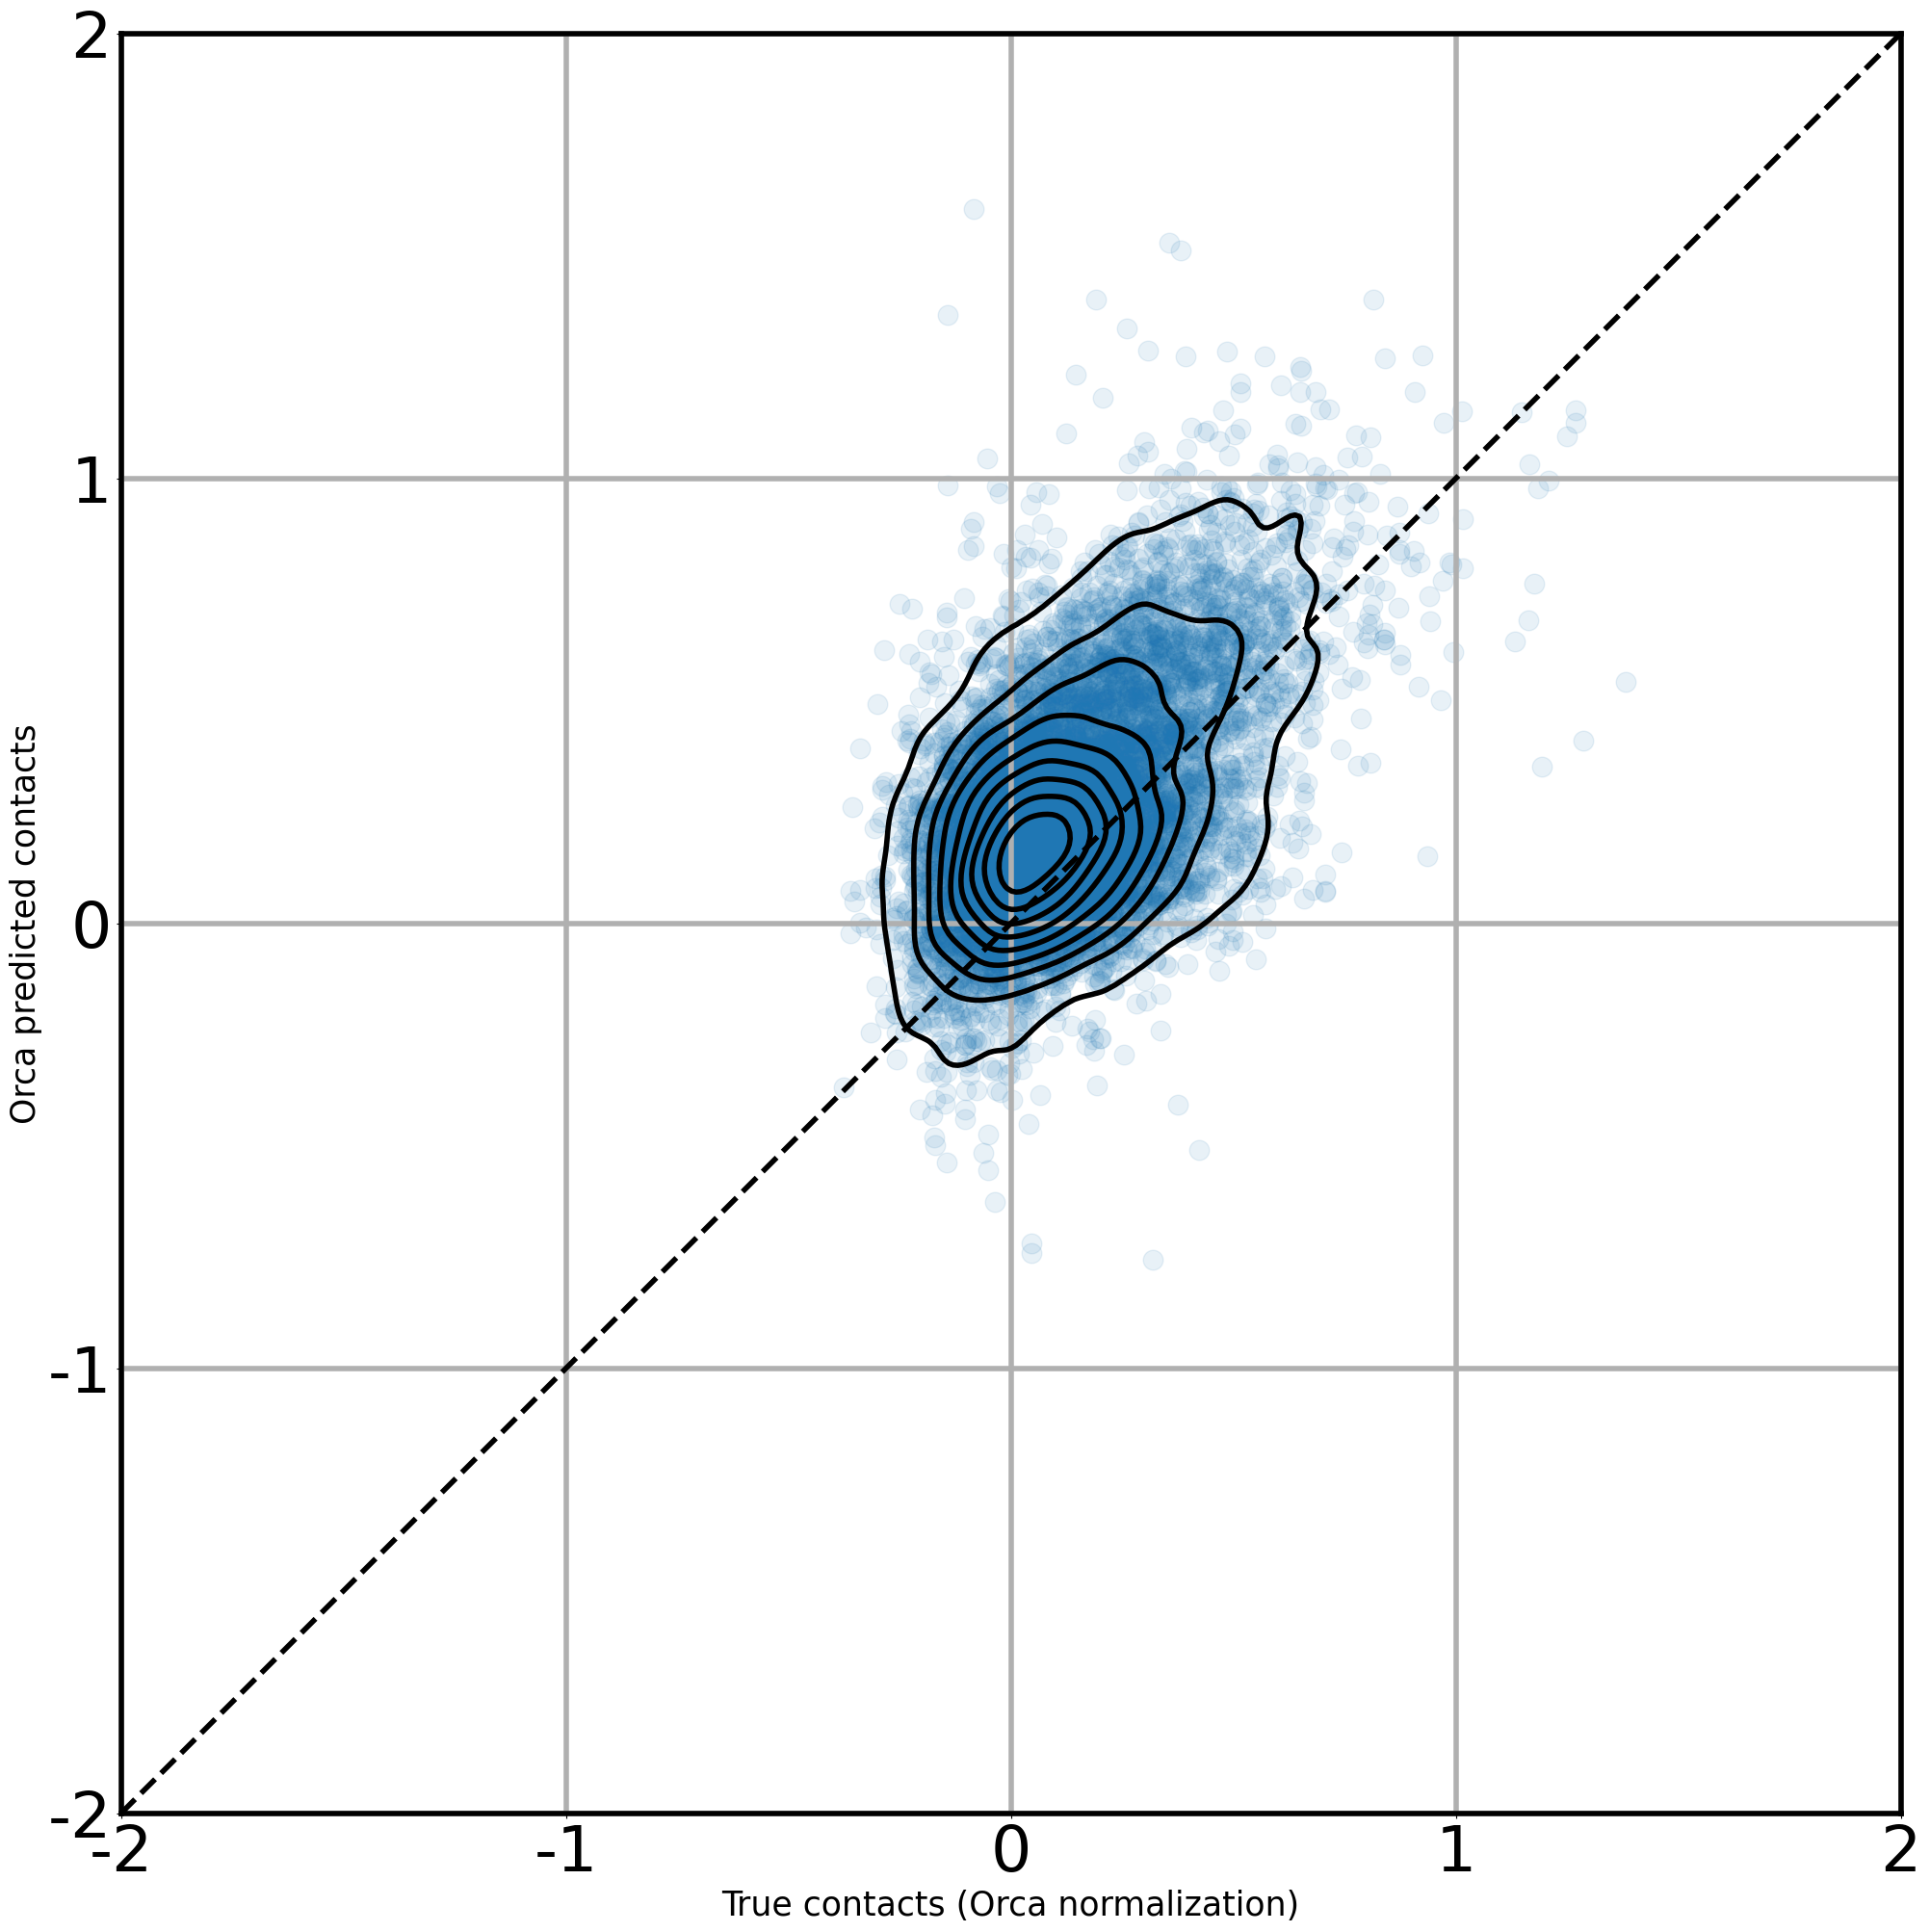

In [8]:
figure, axis = plt.subplots(1, 1, figsize=(24, 24))

axis.scatter(all_true_orca, all_pred_orca, color="#1f77b4", alpha=0.1, s=220, label=f"Avg R: {np.mean(all_orca_corr_orca_norm):.4f}")
sns.kdeplot(x=all_true_orca, y=all_pred_orca, color='black', linewidths=4, ax=axis)
axis.set_xlim([-2, 2])
axis.set_xticks([-2, -1, 0, 1, 2])
axis.set_xticklabels([-2, -1, 0, 1, 2], fontsize=48)
axis.set_ylim([-2, 2])
axis.set_yticks([-2, -1, 0, 1, 2])
axis.set_yticklabels([-2, -1, 0, 1, 2], fontsize=48)
axis.plot([-2, 2], [-2, 2], '--', c='black', linewidth=4)
axis.set_xlabel("True contacts (Orca normalization)")
axis.set_ylabel("Orca predicted contacts")
axis.grid(True)
axis.grid(linewidth=4)

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(4)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

plt.savefig("../../figures/regression_accuracy/orca_pred_orca_norm_h1esc.png", transparent=True)
plt.show()

## Plot Density plot between observed and predicted Hi-C data (Orca prediction and observed data with TwinC normalization)

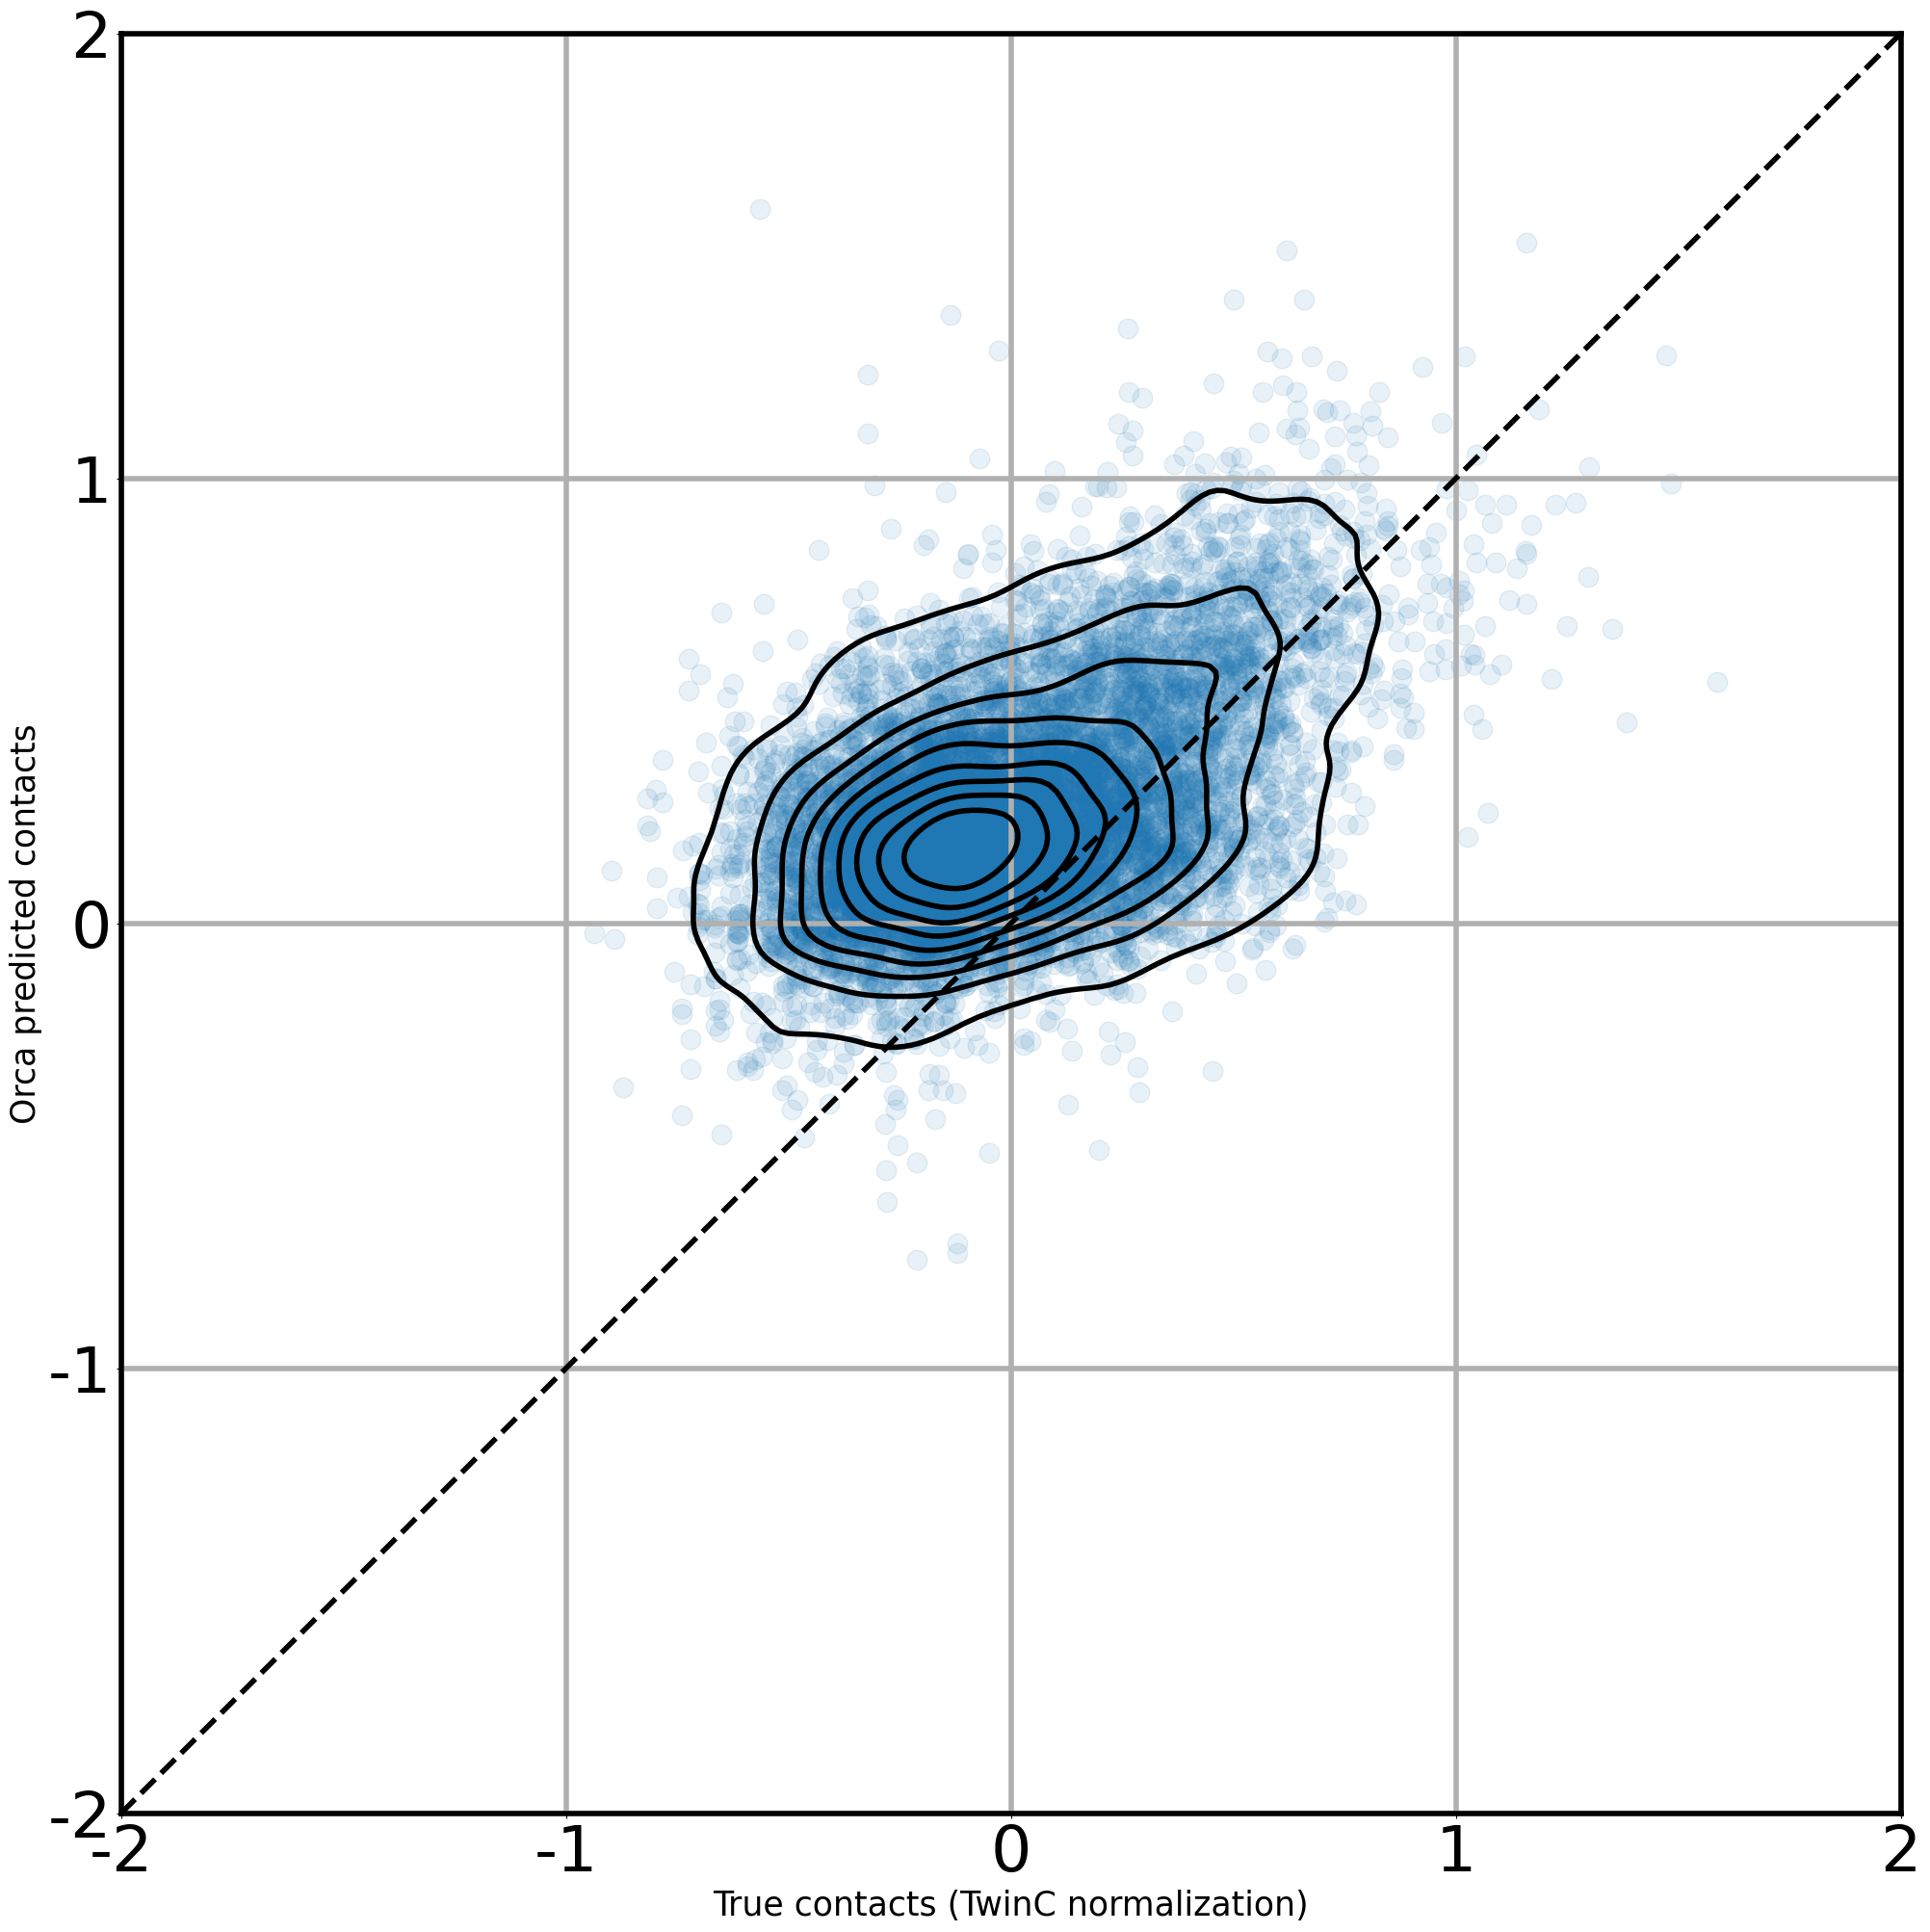

In [9]:
figure, axis = plt.subplots(1, 1, figsize=(24, 24))

axis.scatter(all_true_twinc, all_pred_orca, color="#1f77b4", alpha=0.1, s=220, label=f"Avg R: { np.mean(all_orca_corr_twinc_norm):.4f}")
sns.kdeplot(x=all_true_twinc, y=all_pred_orca, color='black', linewidths=4, ax=axis)
axis.set_xlim([-2, 2])
axis.set_xticks([-2, -1, 0, 1, 2])
axis.set_xticklabels([-2, -1, 0, 1, 2], fontsize=48)
axis.set_ylim([-2, 2])
axis.set_yticks([-2, -1, 0, 1, 2])
axis.set_yticklabels([-2, -1, 0, 1, 2], fontsize=48)
axis.plot([-2, 2], [-2, 2], '--', c='black', linewidth=4)
axis.set_xlabel("True contacts (TwinC normalization)")
axis.set_ylabel("Orca predicted contacts")
axis.grid(True)
axis.grid(linewidth=4)

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(4)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

plt.savefig("../../figures/regression_accuracy/orca_pred_twinc_norm_h1esc.png", transparent=True)
plt.show()